To fetch values from FaunaDB

walletValues
  .walletValueByDate("0x902402569DFdBd2E7Ca3D48a6447d7ED200E6d39")
  .where(.isDaily == true)
  .map(x => ({
    date: x.date,
    totalValueUSD: x.totalValueUSD,
    kDailyRewards: x.kDailyRewards,
    kTotalRewards: x.kTotalRewards
  }))
  .paginate(100)


Date and kTotalRewards:
      date  kTotalRewards
2024-08-12   2.531929e+19
2024-08-13   2.532548e+19
2024-08-14   2.533156e+19
2024-08-15   2.533761e+19
2024-08-16   2.534355e+19
2024-08-17   2.534955e+19
2024-08-18   2.535556e+19
2024-08-19   2.536429e+19
2024-08-20   2.537296e+19
2024-08-21   2.537582e+19
2024-08-22   2.538452e+19
2024-08-23   2.539344e+19
2024-08-24   2.540270e+19
2024-08-25   2.541201e+19
2024-08-26   2.542120e+19
2024-08-27   2.543005e+19
2024-08-28   2.543846e+19
2024-08-29   2.544708e+19
2024-08-30   2.545562e+19
2024-08-31   2.546420e+19
2024-09-01   2.547271e+19
2024-09-02   2.548096e+19
2024-09-03   2.548958e+19
2024-09-04   2.549788e+19
2024-09-05   2.550630e+19
2024-09-06   2.551467e+19
2024-09-07   2.552285e+19
2024-09-08   2.553314e+19
2024-09-09   2.554356e+19
2024-09-10   2.555420e+19
2024-09-11   2.556481e+19
2024-09-12   2.557521e+19
2024-09-13   2.558587e+19
2024-09-14   2.559679e+19
2024-09-15   2.560742e+19
2024-09-16   2.561776e+19
2024-09-17   

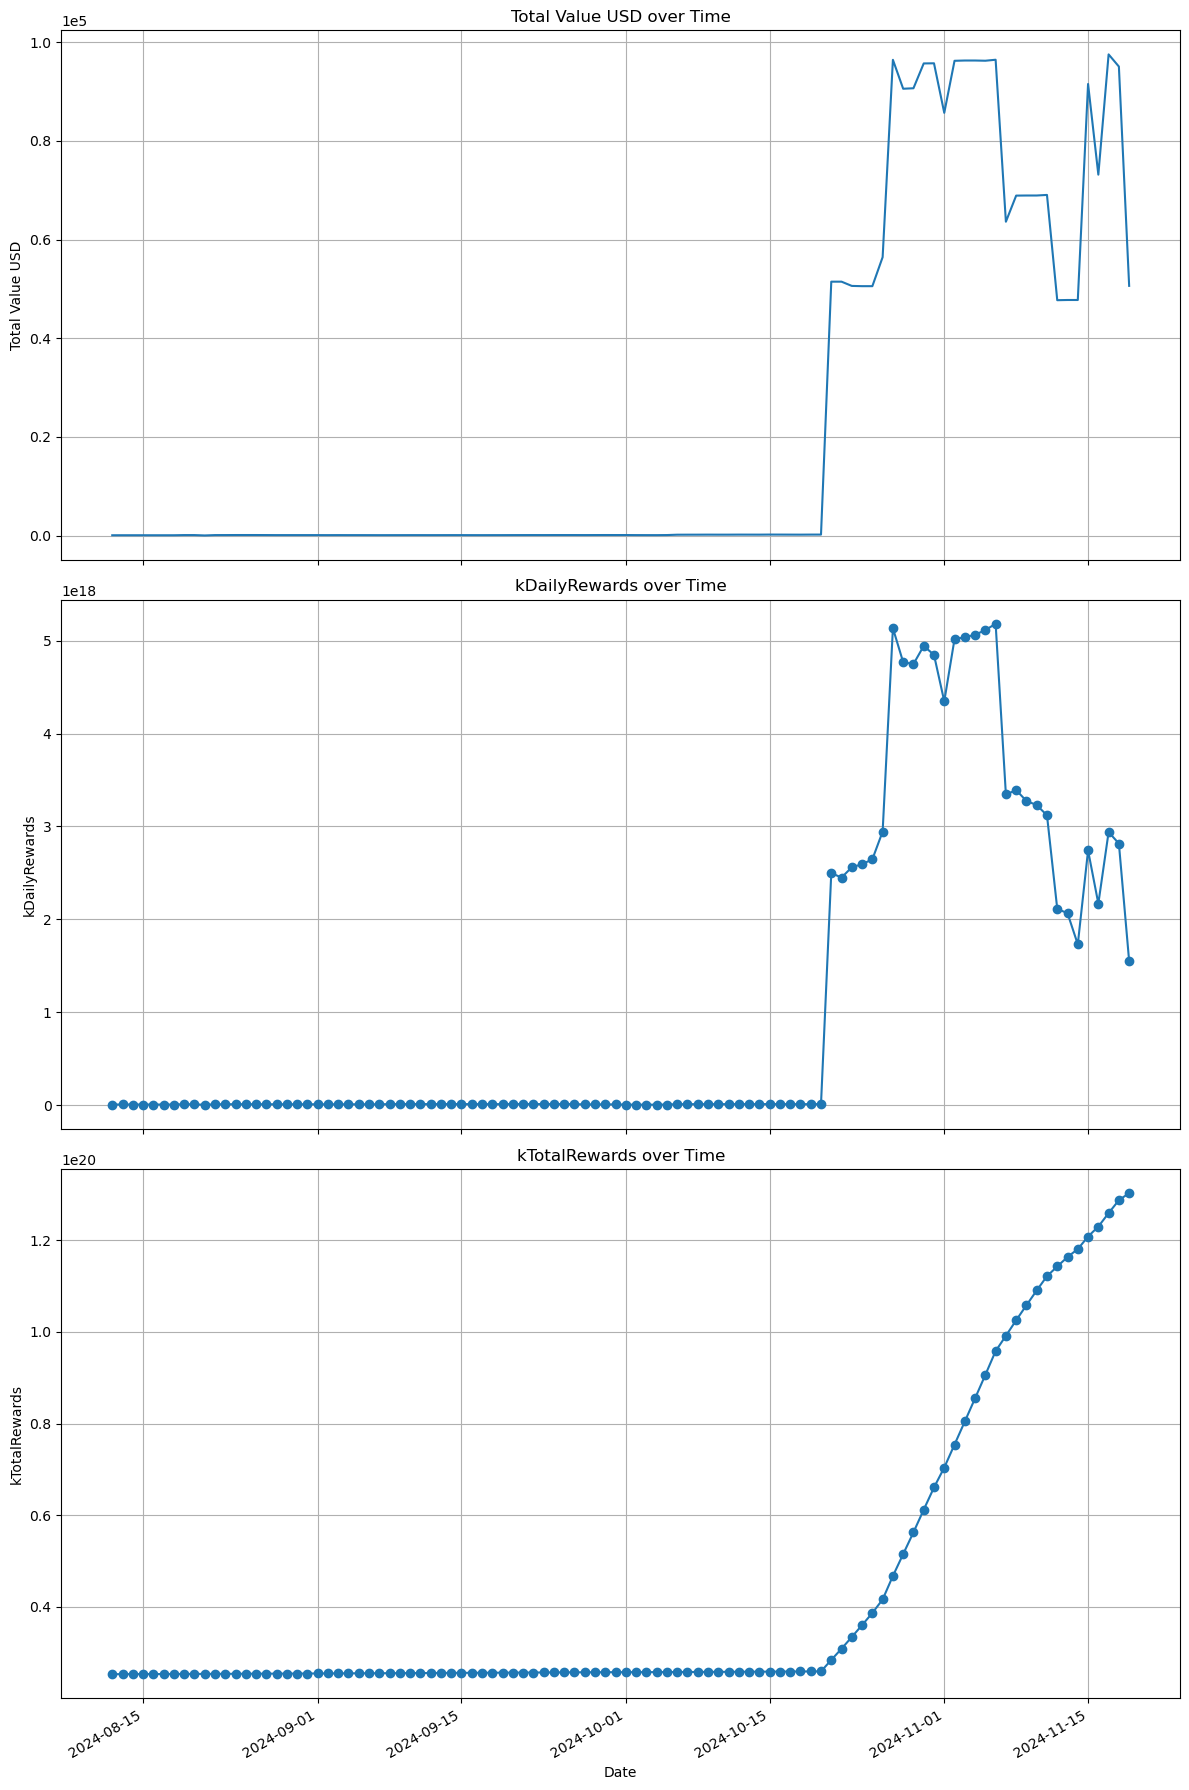

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON data
with open('./data/wallet.json', 'r') as file:
    json_data = json.load(file)

# Extract the data array
data = json_data['data']

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Unix timestamp to datetime
df['date'] = pd.to_datetime(df['date'], unit='s')

# Sort by date
df = df.sort_values('date')

# Convert null values to NaN for easier handling
df = df.replace({None: np.nan})

# Print date and totalValueUSD side by side
print("\nDate and kTotalRewards:")
print(df[['date', 'kTotalRewards']].to_string(index=False))

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plot totalValueUSD
ax1.plot(df['date'], df['totalValueUSD'])
ax1.set_title('Total Value USD over Time')
ax1.set_ylabel('Total Value USD')
ax1.grid(True)

# Plot kDailyRewards
mask_daily = df['kDailyRewards'].notna()
ax2.plot(df.loc[mask_daily, 'date'], df.loc[mask_daily, 'kDailyRewards'], '-o')
ax2.set_title('kDailyRewards over Time')
ax2.set_ylabel('kDailyRewards')
ax2.grid(True)

# Plot kTotalRewards
mask_total = df['kTotalRewards'].notna()
ax3.plot(df.loc[mask_total, 'date'], df.loc[mask_total, 'kTotalRewards'], '-o')
ax3.set_title('kTotalRewards over Time')
ax3.set_xlabel('Date')
ax3.set_ylabel('kTotalRewards')
ax3.grid(True)

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Use a scientific notation for y-axis
for ax in [ax1, ax2, ax3]:
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('multi_plot_visualization_non_zero.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'multi_plot_visualization_non_zero.png'")

# Display the plot
plt.show()